# Visualized various Outlier Detection methods such as isolation forest,LOF,DBSCAN

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
n_samples = 500
n_outliers = int(0.1 * n_samples)
n_inliers = n_samples - n_outliers

X_inliers, _ = make_blobs(n_samples=n_inliers, centers=5, cluster_std=1, random_state=1)
X_outliers = np.random.uniform(low=-3, high=3, size=(n_outliers, 2))
X_outliers = np.random.uniform(low=-10, high=10, size=(n_outliers, 2))
X = np.r_[X_inliers, X_outliers]
labels = np.zeros(n_samples, dtype=int)
labels[-n_outliers:] = 1
print("Inliers shape:", X_inliers.shape)
print("Outliers shape:", X_outliers.shape)
print("Combined shape:", X.shape)

Inliers shape: (450, 2)
Outliers shape: (50, 2)
Combined shape: (500, 2)


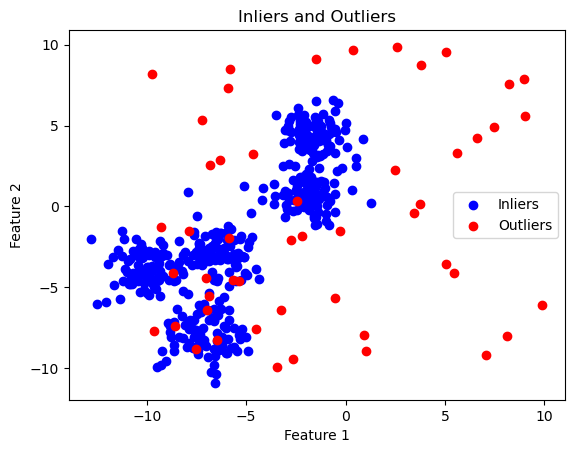

In [3]:
plt.scatter(X_inliers[:, 0], X_inliers[:, 1], color='blue', label='Inliers')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], color='red', label='Outliers')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Inliers and Outliers')
plt.show()

In [4]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF']).reversed()

In [5]:
iso_forest = IsolationForest(contamination=n_outliers/n_samples, random_state=42)
iso_forest.fit(X)
y_pred_iso_forest = iso_forest.predict(X)
y_pred_iso_forest = np.where(y_pred_iso_forest == 1, 0, 1)

In [6]:
correct = np.sum(y_pred_iso_forest == labels)
print("Accuracy: ", correct/n_samples)

Accuracy:  0.924


In [7]:
def plot(X,y_pred,true_labels,title_str):
    true_positive=(y_pred_iso_forest == 1) & (labels == 1)
    false_positive=(y_pred_iso_forest == 1) & (labels == 0)
    true_negative=(y_pred_iso_forest == 0) & (labels == 0)
    false_negative=(y_pred_iso_forest == 0) & (labels == 1)
    plt.figure(figsize=(10,8))
    plt.title(title_str)
    plt.plot(X[true_positive,0],X[true_positive,1],'go',label='True Positive')
    plt.plot(X[false_positive,0],X[false_positive,1],'ro',label='False Positive')
    plt.plot(X[true_negative,0],X[true_negative,1],'bo',label='True Negative')
    plt.plot(X[false_negative,0],X[false_negative,1],'ko',label='False Negative')
    plt.legend()

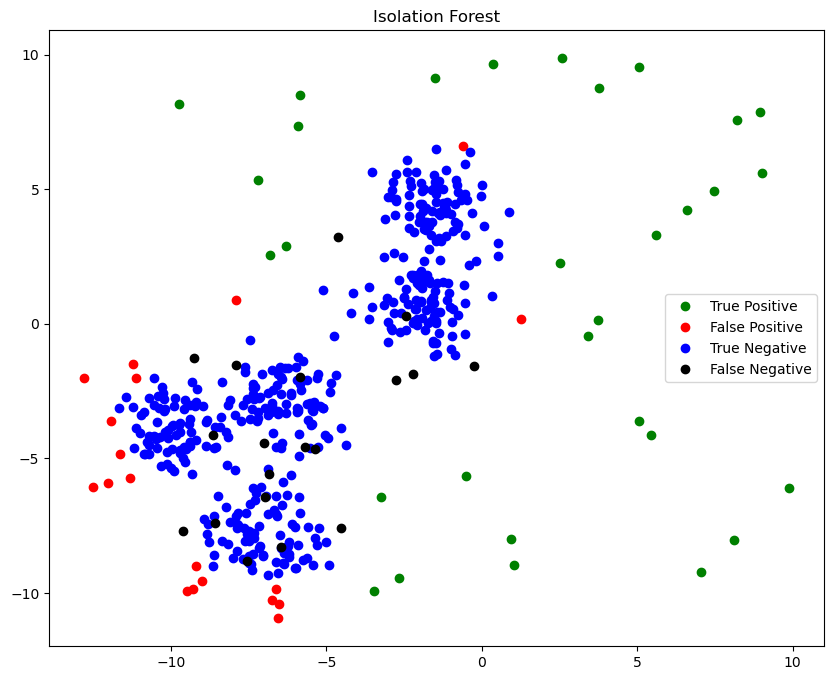

In [8]:
plot(X, y_pred_iso_forest, labels,title_str='Isolation Forest')

## Using LOF method

In [9]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=(n_outliers)/n_samples)
y_pred_lof = lof.fit_predict(X)
y_pred_lof = np.where(y_pred_lof == 1, 0, 1)

In [10]:
accuraccy = np.sum(y_pred_lof == labels) / n_samples
print("Accuracy of LOF method: ", accuraccy)

Accuracy of LOF method:  0.94


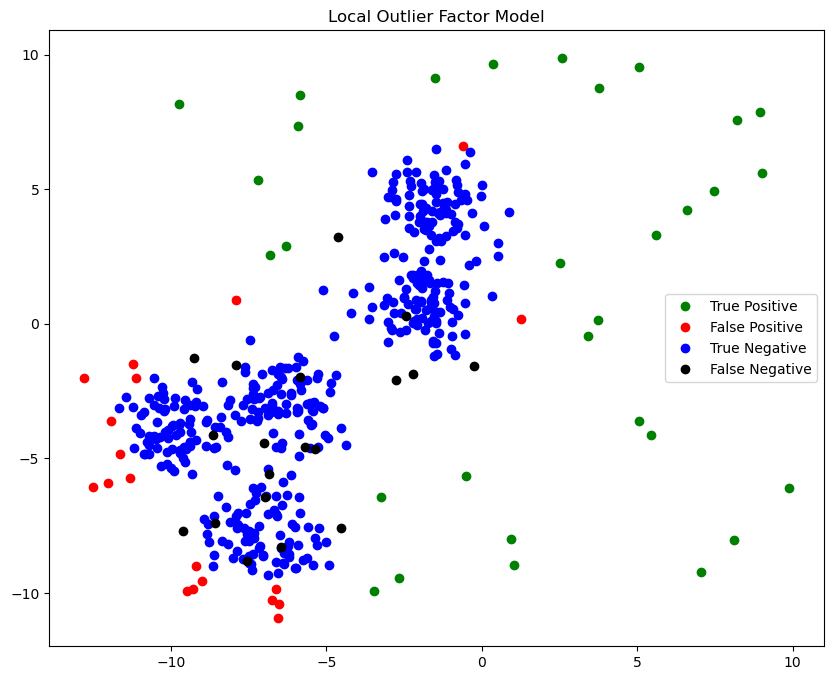

In [11]:
plot(X, y_pred_lof, labels,title_str='Local Outlier Factor Model')

# DBSCAN

In [12]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_pred_dbscan = dbscan.fit_predict(X)
y_pred_dbscan = np.where(y_pred_dbscan == -1, 1, 0)

In [13]:
accuraccy = np.sum(y_pred_dbscan == labels) / n_samples
print("Accuracy of DBSCAN method: ", accuraccy)

Accuracy of DBSCAN method:  0.836


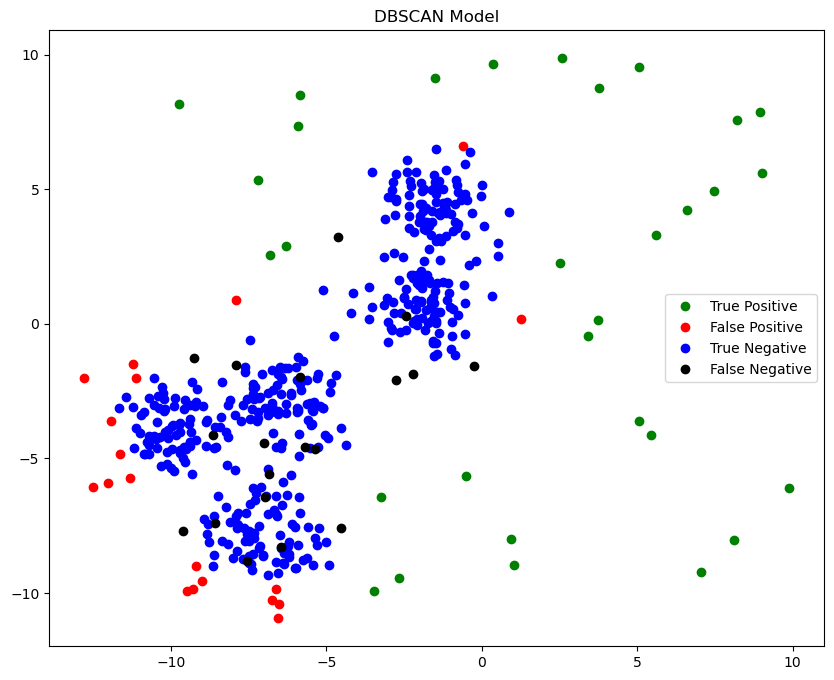

In [14]:
plot(X, y_pred_dbscan, labels,title_str='DBSCAN Model')